# Data Wrangling: Sydney Airbnb Listings

Questions I'm trying to answer: Are there any correlations between listing prices and the various listing attributes? Do Superhosts or hosts with higher review ratings have higher listing prices? How does pricing look like in different neighbourhoods? What's the seasonal pattern of Airbnb listings in Sydney?

In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Load listings data
listings_raw = pd.read_csv('/Users/marianne_tan/Desktop/Capstone Project/datasets/listings.csv',low_memory=False)

# Load calendar data
calendar_raw = pd.read_csv('/Users/marianne_tan/Desktop/Capstone Project/datasets/calendar.csv',low_memory=False)

# Clean Listings Data

Listings.csv contains Sydney Airbnb listings data which includes various attributes of each listing such as price, property type, neighbourhood, review scores etc. However, not all columns are relevant for our analysis so we'll only be selecting a few columns from the data set.

In [3]:
listings_raw.shape

(33430, 96)

In [4]:
# Get list of column names
listings_raw.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
# Select relevant columns
listings = listings_raw[[
     "id"
    ,"host_id"
    ,"host_since"
    ,"host_response_time"
    ,"host_response_rate"
    ,"host_is_superhost"
    ,"host_listings_count"
    ,"host_identity_verified"
    ,"neighbourhood"
    ,"zipcode"
    ,"property_type"
    ,"room_type"
    ,"accommodates"                      
    ,"bathrooms"
    ,"bedrooms"
    ,"amenities"
    ,"price"
    ,"minimum_nights"
    ,"number_of_reviews"
    ,"review_scores_rating"
    ,"instant_bookable"
    ,"cancellation_policy" 
]]

In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33430 entries, 0 to 33429
Data columns (total 22 columns):
id                        33430 non-null int64
host_id                   33430 non-null int64
host_since                33347 non-null object
host_response_time        14249 non-null object
host_response_rate        14249 non-null object
host_is_superhost         33347 non-null object
host_listings_count       33347 non-null float64
host_identity_verified    33347 non-null object
neighbourhood             28183 non-null object
zipcode                   33254 non-null object
property_type             33430 non-null object
room_type                 33430 non-null object
accommodates              33430 non-null int64
bathrooms                 33408 non-null float64
bedrooms                  33421 non-null float64
amenities                 33430 non-null object
price                     33430 non-null object
minimum_nights            33430 non-null int64
number_of_reviews         33

In [7]:
listings.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,zipcode,...,accommodates,bathrooms,bedrooms,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy
0,11154941,573182,2011-05-10,NaN,NaN,f,1.0,t,Newtown/Enmore,2042,...,1,1.5,1.0,"{Internet,Wifi,Kitchen,""Smoking allowed"",""Smok...",$33.00,6,1,100.0,f,flexible
1,11169113,56897899,2016-01-31,within a few hours,100%,t,3.0,f,Balgowlah,2093,...,5,1.0,2.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$245.00,1,8,100.0,f,strict_14_with_grace_period
2,12119402,15469257,2014-05-13,within an hour,100%,f,120.0,f,Central Business District,2000,...,5,2.0,2.0,"{TV,Internet,Wifi,""Air conditioning"",Pool,Kitc...",$295.00,28,10,94.0,t,strict_14_with_grace_period
3,13019921,66013615,2016-04-06,NaN,NaN,f,1.0,f,Paddington,2021,...,4,1.0,2.0,"{TV,Internet,Wifi,Pool,Kitchen,""Free parking o...",$219.00,14,0,NaN,f,strict_14_with_grace_period
4,11849408,16357713,2014-06-04,within an hour,83%,f,96.0,t,Mosman,2088,...,6,1.0,3.0,"{TV,Wifi,Kitchen,""Free parking on premises"",""F...",$343.00,7,1,100.0,t,super_strict_60


In [8]:
# Determine number of missing values in columns
len(listings) - listings.count()

id                            0
host_id                       0
host_since                   83
host_response_time        19181
host_response_rate        19181
host_is_superhost            83
host_listings_count          83
host_identity_verified       83
neighbourhood              5247
zipcode                     176
property_type                 0
room_type                     0
accommodates                  0
bathrooms                    22
bedrooms                      9
amenities                     0
price                         0
minimum_nights                0
number_of_reviews             0
review_scores_rating      10809
instant_bookable              0
cancellation_policy           0
dtype: int64

In [9]:
# Review columns with missing values
listings.loc[:, listings.isnull().any()]

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,zipcode,bathrooms,bedrooms,review_scores_rating
0,2011-05-10,NaN,NaN,f,1.0,t,Newtown/Enmore,2042,1.5,1.0,100.0
1,2016-01-31,within a few hours,100%,t,3.0,f,Balgowlah,2093,1.0,2.0,100.0
2,2014-05-13,within an hour,100%,f,120.0,f,Central Business District,2000,2.0,2.0,94.0
3,2016-04-06,NaN,NaN,f,1.0,f,Paddington,2021,1.0,2.0,NaN
4,2014-06-04,within an hour,83%,f,96.0,t,Mosman,2088,1.0,3.0,100.0
5,2015-10-25,NaN,NaN,f,0.0,t,Chippendale,2008,1.0,1.0,88.0
6,2014-03-05,within an hour,100%,f,1.0,t,Woolloomooloo,2011,1.0,2.0,93.0
7,2016-05-05,within an hour,100%,f,38.0,t,Darlinghurst,2000,1.0,2.0,88.0
8,2015-01-21,NaN,NaN,f,1.0,t,Alexandria,2015,1.5,1.0,100.0
9,2016-07-13,NaN,NaN,f,1.0,f,Paddington,2021,2.0,1.0,NaN


In [10]:
# Drop NaN values - exclude host reponse time/rate, neighbourhood and review scores
listings = listings.dropna(how='any', subset=['host_since','host_is_superhost','host_listings_count',
                                              'host_identity_verified','zipcode','bathrooms','bedrooms'])

# Convert formatting of price and response rate
listings['price'] = listings['price'].str.replace('$','')
listings['price'] = listings['price'].str.replace(',','').astype('float64')
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%', '').astype('float64')
                                                                            
                                                                            
# Change f/t values to binary 0/1
listings['host_is_superhost'] = listings['host_is_superhost'].replace('t',1)
listings['host_is_superhost'] = listings['host_is_superhost'].replace('f',0)
listings['host_identity_verified'] = listings['host_identity_verified'].replace('t',1)
listings['host_identity_verified'] = listings['host_identity_verified'].replace('f',0)
listings['instant_bookable'] = listings['instant_bookable'].replace('t',1)
listings['instant_bookable'] = listings['instant_bookable'].replace('f',0)                  

listings.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,zipcode,...,accommodates,bathrooms,bedrooms,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy
0,11154941,573182,2011-05-10,NaN,NaN,0,1.0,1,Newtown/Enmore,2042,...,1,1.5,1.0,"{Internet,Wifi,Kitchen,""Smoking allowed"",""Smok...",33.0,6,1,100.0,0,flexible
1,11169113,56897899,2016-01-31,within a few hours,100.0,1,3.0,0,Balgowlah,2093,...,5,1.0,2.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",245.0,1,8,100.0,0,strict_14_with_grace_period
2,12119402,15469257,2014-05-13,within an hour,100.0,0,120.0,0,Central Business District,2000,...,5,2.0,2.0,"{TV,Internet,Wifi,""Air conditioning"",Pool,Kitc...",295.0,28,10,94.0,1,strict_14_with_grace_period
3,13019921,66013615,2016-04-06,NaN,NaN,0,1.0,0,Paddington,2021,...,4,1.0,2.0,"{TV,Internet,Wifi,Pool,Kitchen,""Free parking o...",219.0,14,0,NaN,0,strict_14_with_grace_period
4,11849408,16357713,2014-06-04,within an hour,83.0,0,96.0,1,Mosman,2088,...,6,1.0,3.0,"{TV,Wifi,Kitchen,""Free parking on premises"",""F...",343.0,7,1,100.0,1,super_strict_60


In [11]:
listings.shape

(33140, 22)

In [12]:
listings.describe()

,id,host_id,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
count,3.314000e+04,3.314000e+04,14159.000000,33140.000000,33140.000000,33140.000000,33140.000000,33140.000000,33140.00000,33140.000000,33140.000000,33140.00000,22476.000000,33140.000000
mean,1.689382e+07,5.932521e+07,93.161876,0.124955,8.269101,0.408962,3.376071,1.351267,1.59306,206.690495,5.103983,12.66213,93.548986,0.383917
std,7.709454e+06,5.776017e+07,19.225348,0.330673,29.765344,0.491650,2.221289,0.667943,1.10757,344.937832,16.455603,29.08817,9.560395,0.486345
min,1.235100e+04,8.346000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.00000,20.000000,0.000000
25%,1.023528e+07,1.376474e+07,100.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.00000,78.000000,1.000000,0.00000,91.000000,0.000000
50%,1.816792e+07,3.666500e+07,100.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.00000,130.000000,2.000000,2.00000,97.000000,0.000000
75%,2.272279e+07,9.578568e+07,100.000000,0.000000,2.000000,1.000000,4.000000,1.500000,2.00000,219.000000,5.000000,10.00000,100.000000,1.000000
max,2.905160e+07,2.189189e+08,100.000000,1.000000,258.000000,1.000000,70.000000,14.000000,46.00000,14999.000000,1000.000000,481.00000,100.000000,1.000000


In [13]:
# Look into 0 values of host_listings_count and price
print('No. of host listings count 0:', len(listings[listings['host_listings_count'] == 0]))
print('No of price 0:', len(listings[listings['price'] == 0]))

No. of host listings count 0: 40
No of price 0: 10


In [14]:
# Drop 0 values
listings = listings[listings['host_listings_count'] != 0]
listings = listings[listings['price'] != 0]

In [15]:
# Review accommodates column - the max value should be 16
listings['accommodates'].value_counts(dropna=False)

2     14271
4      6177
1      3441
6      2785
3      2045
5      1527
8      1271
7       647
10      423
9       222
12      114
11       66
16       32
15       27
14       23
13       18
70        1
Name: accommodates, dtype: int64

In [16]:
# Drop outlier for accommodates
listings = listings[listings['accommodates'] <= 16]

In [17]:
listings.describe()

,id,host_id,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
count,3.308900e+04,3.308900e+04,14151.000000,33089.000000,33089.000000,33089.000000,33089.000000,33089.000000,33089.000000,33089.000000,33089.000000,33089.000000,22449.000000,33089.000000
mean,1.689913e+07,5.934079e+07,93.168610,0.125026,8.278189,0.408867,3.374626,1.351386,1.592191,206.387228,5.106833,12.667503,93.551695,0.384146
std,7.710070e+06,5.777659e+07,19.210884,0.330754,29.785387,0.491632,2.191592,0.668119,1.092592,335.439474,16.467237,29.093685,9.557280,0.486400
min,1.235100e+04,8.346000e+03,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,1.000000,0.000000,20.000000,0.000000
25%,1.023703e+07,1.376457e+07,100.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,78.000000,1.000000,0.000000,91.000000,0.000000
50%,1.818026e+07,3.665886e+07,100.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,130.000000,2.000000,2.000000,97.000000,0.000000
75%,2.273288e+07,9.580649e+07,100.000000,0.000000,2.000000,1.000000,4.000000,1.500000,2.000000,219.000000,5.000000,10.000000,100.000000,1.000000
max,2.905160e+07,2.189189e+08,100.000000,1.000000,258.000000,1.000000,16.000000,14.000000,46.000000,13456.000000,1000.000000,481.000000,100.000000,1.000000


In [18]:
# Review categorical data
print(listings['zipcode'].value_counts(dropna=False))
print(listings['room_type'].value_counts(dropna=False))
print(listings['property_type'].value_counts(dropna=False))
print(listings['cancellation_policy'].value_counts(dropna=False))

2026          3709
2010          1987
2095          1134
2000          1091
2011          1021
2031           973
2034           885
2017           707
2042           660
2021           595
2016           579
2022           579
2035           565
2024           554
2096           508
2088           494
2099           453
2107           444
2009           434
2008           410
2037           402
2093           382
2065           375
2060           368
2007           343
2041           322
2127           311
2015           304
2029           304
2023           291
              ... 
NSW 2022         2
2753             2
4215             1
7441             1
2766\n2766       1
1711             1
NSW 2025         1
2313             1
2558             1
2080             1
8001             1
2091             1
3150             1
5141             1
5533             1
2175             1
1783             1
2304             1
2216\n2216       1
8185             1
5893             1
2748        

In [19]:
# Drop inconsistent zipcode values - Sydney has 4 digit zipcodes
listings = listings[listings['zipcode'].str.len() == 4]

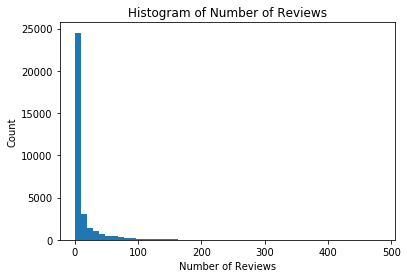

In [20]:
# Visualize review distribution
plt.hist(listings['number_of_reviews'],bins=50)
plt.title("Histogram of Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()

In [21]:
print('No of listings with >80 reviews:', len(listings[listings['number_of_reviews'] > 80]))
print('% of listings with >80 reviews:', 
      round((len(listings[listings['number_of_reviews'] > 80])/len(listings['number_of_reviews'])*100),2))

No of listings with >80 reviews: 1160
% of listings with >80 reviews: 3.51


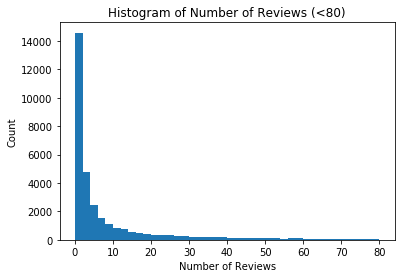

In [22]:
# Visualize review distribution with listings <80 reviews
listings_80r = listings[listings['number_of_reviews'] <= 80]
plt.hist(listings_80r['number_of_reviews'],bins=40)
plt.title("Histogram of Number of Reviews (<80)")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()

In [23]:
# Convert number_of_reviews into buckets
def convert_review_buckets(val):
    if val > 20:
        return '20+'
    elif val >= 16 and val <= 20:
        return '16-20'
    elif val >= 11 and val <= 15:
        return '11-15'
    elif val >= 6 and val <= 10:
        return '6-10'
    elif val >= 1 and val <= 5:
        return '1-5'
    elif val < 1:
        return 'No Reviews'
       
listings['reviews_buckets'] = listings['number_of_reviews'].apply(convert_review_buckets)

In [24]:
# Convert review_scores_rating into buckets
def convert_scores_buckets(val):
    if val == 100.0:
        return '100'
    elif val >= 95.0 and val < 99.0:
        return '95-99'
    elif val >= 90.0 and val < 95.0:
        return '90-94'
    elif val >= 85.0 and val < 90.0:
        return '85-89'
    elif val >= 80.0 and val < 85.0:
        return '80-84'
    elif val < 80.0:
        return '<80'
    
listings['review_scores_buckets'] = listings['review_scores_rating'].apply(convert_scores_buckets)

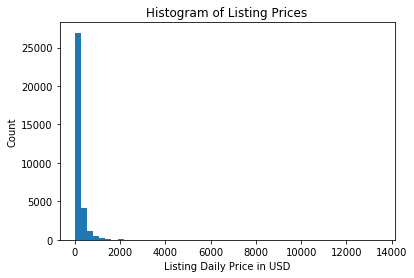

In [25]:
# Visualize pricing distribution
plt.hist(listings['price'],bins=50)
plt.title("Histogram of Listing Prices")
plt.xlabel("Listing Daily Price in USD")
plt.ylabel("Count")
plt.show()

In [26]:
# Review listings with price > $750
listings[listings['price'] > 750]

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,zipcode,...,bedrooms,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_buckets,review_scores_buckets
55,22208676,11914644,2014-02-03,within a day,69.0,0,121.0,1,Mosman,2088,...,4.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",847.0,7,0,NaN,0,strict_14_with_grace_period,No Reviews,None
110,1768995,1201749,2011-09-24,NaN,NaN,0,2.0,1,Pyrmont,2009,...,2.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",901.0,5,0,NaN,0,strict_14_with_grace_period,No Reviews,None
120,4205835,21822214,2014-09-26,NaN,NaN,1,7.0,1,Ultimo,2007,...,4.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",779.0,5,70,95.0,1,moderate,20+,95-99
167,341640,1733351,2012-02-10,within an hour,100.0,0,2.0,1,NaN,2026,...,1.0,"{TV,Internet,Wifi,Kitchen,Heating,Washer,Dryer}",1000.0,3,10,96.0,0,moderate,6-10,95-99
173,58954,282630,2010-11-09,NaN,NaN,0,1.0,1,Bondi Junction,2022,...,4.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets all...",1097.0,7,0,NaN,0,strict_14_with_grace_period,No Reviews,None
211,73802,386391,2011-02-10,NaN,NaN,0,1.0,1,Coogee,2034,...,5.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1691.0,14,13,98.0,0,strict_14_with_grace_period,11-15,95-99
294,466383,2315641,2012-05-07,NaN,NaN,0,1.0,1,NaN,2099,...,4.0,"{TV,""Cable TV"",Internet,Wifi,Pool,Kitchen,""Fre...",954.0,7,2,100.0,0,strict_14_with_grace_period,1-5,100
330,274251,1433530,2011-11-22,NaN,NaN,0,1.0,0,Lilyfield/Rozelle,2039,...,5.0,"{TV,Wifi,""Air conditioning"",Breakfast,""Family/...",901.0,2,2,90.0,0,moderate,1-5,90-94
371,765619,3046924,2012-07-24,within a few hours,100.0,0,45.0,1,Palm Beach,2108,...,4.0,"{TV,""Cable TV"",Internet,Wifi,Pool,Kitchen,""Fre...",1250.0,7,3,100.0,0,strict_14_with_grace_period,1-5,100
432,659009,3046924,2012-07-24,within a few hours,100.0,0,45.0,1,Darlinghurst,2010,...,3.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1500.0,7,13,100.0,0,strict_14_with_grace_period,11-15,100


Since only 3.3% of listings have a daily price of > 750 dollars, we will focus on listings < 750 dollars.

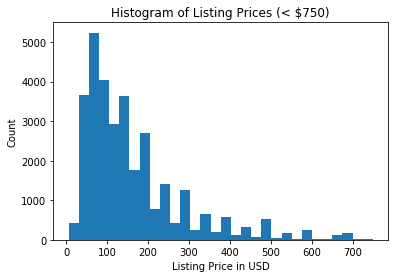

In [27]:
# Visualize pricing distribution
listings_below_750 = listings[listings['price'] < 750]
plt.hist(listings_below_750['price'],bins=30)
plt.title("Histogram of Listing Prices (< $750)")
plt.xlabel("Listing Price in USD")
plt.ylabel("Count")
plt.show()

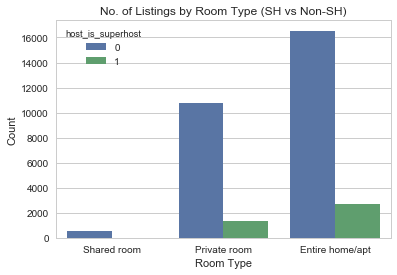

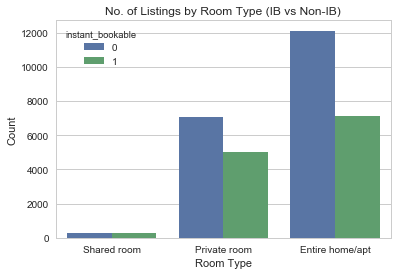

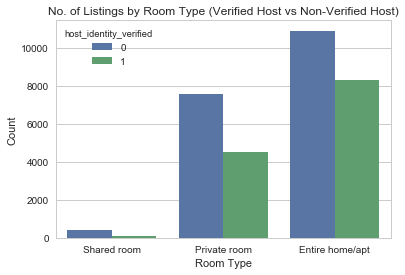

In [28]:
# Understanding room type split

# Visualize room type split by superhost
sns.set(style="whitegrid")
cp1 = sns.countplot(x='room_type', hue='host_is_superhost', data=listings_below_750, 
                    order=['Shared room','Private room','Entire home/apt'])
cp1 = plt.xlabel('Room Type')
cp1 = plt.ylabel('Count')
cp1 = plt.title('No. of Listings by Room Type (SH vs Non-SH)')
plt.show()

# Visualize room type split by instant book
cp2 = sns.countplot(x='room_type', hue='instant_bookable', data=listings_below_750, 
                    order=['Shared room','Private room','Entire home/apt'])
cp2 = plt.xlabel('Room Type')
cp2 = plt.ylabel('Count')
cp2 = plt.title('No. of Listings by Room Type (IB vs Non-IB)')
plt.show()

# Visualize room type split by host identity verified
cp3 = sns.countplot(x='room_type', hue='host_identity_verified', data=listings_below_750, 
                    order=['Shared room','Private room','Entire home/apt'])
cp3 = plt.xlabel('Room Type')
cp3 = plt.ylabel('Count')
cp3 = plt.title('No. of Listings by Room Type (Verified Host vs Non-Verified Host)')
plt.show()

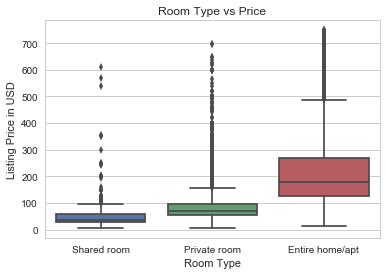

In [29]:
# Visualize room type vs price
bp1 = sns.boxplot(x='room_type', y='price', data=listings_below_750, 
                  order=['Shared room','Private room','Entire home/apt'])
bp1 = plt.xlabel('Room Type')
bp1 = plt.ylabel('Listing Price in USD')
bp1 = plt.title('Room Type vs Price')
plt.show()

In [30]:
listings_below_750.groupby("room_type").price.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,19227.0,218.828522,133.115567,13.0,126.0,178.0,270.0,749.0
Private room,12097.0,83.413326,55.497986,6.0,54.0,69.0,95.0,699.0
Shared room,554.0,53.850181,57.942239,6.0,30.0,37.0,56.5,612.0


As expected, shared rooms have the lowest range of prices followed by private rooms and entire homes. 

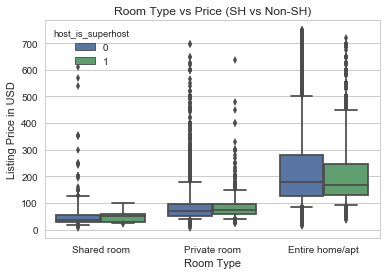

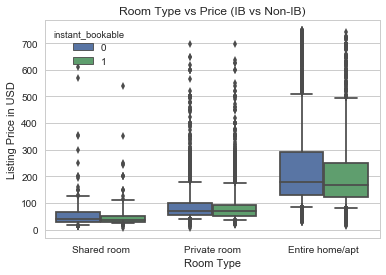

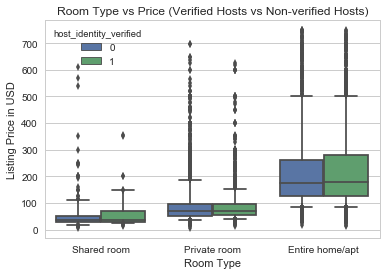

In [31]:
# Visualize room type vs price (split by superhost)
bp2 = sns.boxplot(x='room_type', y='price', hue='host_is_superhost', data=listings_below_750, 
                  order=['Shared room','Private room','Entire home/apt'], whis= [5,95])
bp2 = plt.xlabel('Room Type')
bp2 = plt.ylabel('Listing Price in USD')
bp2 = plt.title('Room Type vs Price (SH vs Non-SH)')
plt.show()

# Visualize room type vs price (split by instant book)
bp3 = sns.boxplot(x='room_type', y='price', hue='instant_bookable', data=listings_below_750, 
                  order=['Shared room','Private room','Entire home/apt'], whis= [5,95])
bp3 = plt.xlabel('Room Type')
bp3 = plt.ylabel('Listing Price in USD')
bp3 = plt.title('Room Type vs Price (IB vs Non-IB)')
plt.show()

# Visualize room type vs price (split by verified host)
bp4 = sns.boxplot(x='room_type', y='price', hue='host_identity_verified', data=listings_below_750, 
                  order=['Shared room','Private room','Entire home/apt'], whis= [5,95])
bp4 = plt.xlabel('Room Type')
bp4 = plt.ylabel('Listing Price in USD')
bp4 = plt.title('Room Type vs Price (Verified Hosts vs Non-verified Hosts)')
plt.show()

Across all 3 room types, Superhost listings have a smaller range in prices. While Instant Book and Host Verfication are said to increase bookings, the median price is relatively similar to listings without Instant Book and Host Verification.

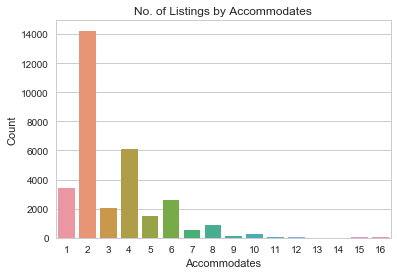

In [32]:
# Visualize distribution of accommodates
sns.set(style="whitegrid")
cp1 = sns.countplot(x='accommodates', data=listings_below_750)
cp1 = plt.xlabel('Accommodates')
cp1 = plt.ylabel('Count')
cp1 = plt.title('No. of Listings by Accommodates')
plt.show()

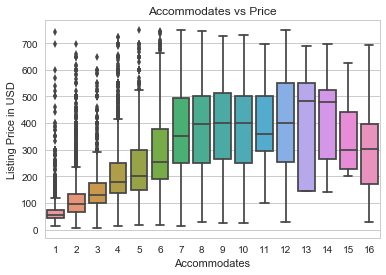

In [33]:
# Visualize accommodates vs price
bp1 = sns.boxplot(x='accommodates', y='price', data=listings_below_750)
bp1 = plt.xlabel('Accommodates')
bp1 = plt.ylabel('Listing Price in USD')
bp1 = plt.title('Accommodates vs Price')
plt.show()

As expected, listing prices are higher for listings which can accommodate more people. Since majority of the listings are private rooms/entire homes, and can accommodate 4 people or less, let's look narrow the dataset further.

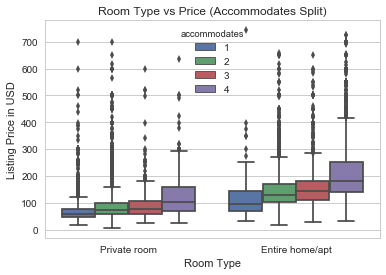

In [34]:
# Narrowing dataset
listings_narrowed = listings_below_750[listings_below_750['room_type'] != 'Shared room']
listings_narrowed = listings_narrowed[listings_narrowed['accommodates'] <= 4]

# Visualize room type vs price split by accommodates
bp2 = sns.boxplot(x='room_type', y='price', hue='accommodates', data=listings_narrowed)
bp2 = plt.xlabel('Room Type')
bp2 = plt.ylabel('Listing Price in USD')
bp2 = plt.title('Room Type vs Price (Accommodates Split)')
plt.show()

As compared to entire homes, the median price for private rooms doesn't increase as much if a listing can accommodate more people.

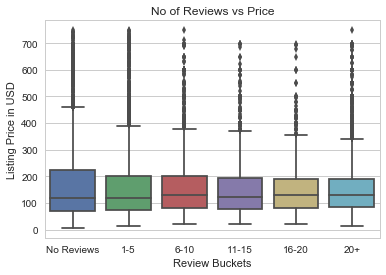

In [35]:
# Visualize number of reviews vs price
bpr = sns.boxplot(x='reviews_buckets', y='price',data=listings_below_750
                 ,order=['No Reviews','1-5','6-10','11-15','16-20','20+'])
bpr = plt.xlabel('Review Buckets')
bpr = plt.ylabel('Listing Price in USD')
bpr = plt.title('No of Reviews vs Price')
plt.show()

Regardless of the number of reviews, the median price is more or less the same. Let's break it down further to see if this applies to Superhosts and Verfied Hosts.

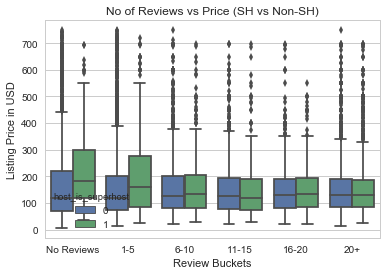

In [36]:
# Visualize number of reviews vs price (split by superhost)
bpr1 = sns.boxplot(x='reviews_buckets', y='price', hue='host_is_superhost', data=listings_below_750
                 ,order=['No Reviews','1-5','6-10','11-15','16-20','20+'])
bpr1 = plt.xlabel('Review Buckets')
bpr1 = plt.ylabel('Listing Price in USD')
bpr1 = plt.title('No of Reviews vs Price (SH vs Non-SH)')
plt.show()

For listings with 5 reviews and less, the median price for Superhosts is higher than non-Superhosts.

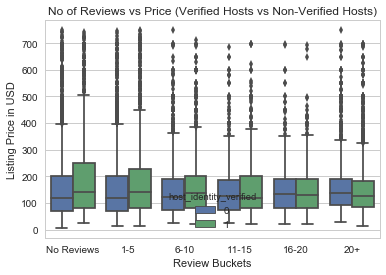

In [37]:
# Visualize number of reviews vs price (split by verified host)
bpr2 = sns.boxplot(x='reviews_buckets', y='price', hue='host_identity_verified', data=listings_below_750
                 ,order=['No Reviews','1-5','6-10','11-15','16-20','20+'])
bpr2 = plt.xlabel('Review Buckets')
bpr2 = plt.ylabel('Listing Price in USD')
bpr2 = plt.title('No of Reviews vs Price (Verified Hosts vs Non-Verified Hosts)')
plt.show()

Verfied hosts have higher listing prices which evens out after 10 reviews. This makes sense as verfication increases trust amongst guests and hosts with few/no reviews are more likely to lower their prices to attract more guest bookings. Hence, new hosts with few/no reviews can optimize their listings by verifying their IDs.

In [38]:
# Review review scores rating
listings_below_750['review_scores_rating'].value_counts(dropna=False)

NaN       9911
 100.0    7546
 98.0     1382
 80.0     1378
 93.0     1344
 90.0     1343
 96.0     1252
 97.0     1241
 95.0     1155
 94.0      767
 99.0      758
 92.0      603
 87.0      461
 91.0      452
 88.0      334
 89.0      320
 60.0      274
 85.0      235
 86.0      152
 84.0      144
 83.0      131
 70.0      131
 20.0       82
 40.0       81
 73.0       70
 82.0       47
 75.0       46
 76.0       38
 67.0       27
 50.0       25
 78.0       24
 77.0       24
 81.0       21
 72.0       15
 79.0       15
 74.0       11
 65.0        9
 71.0        5
 53.0        5
 69.0        5
 64.0        4
 68.0        3
 47.0        3
 55.0        2
 44.0        1
 66.0        1
Name: review_scores_rating, dtype: int64

In [39]:
# Remove NaN scores 
listings_with_reviews = listings_below_750.dropna(how='any', subset=['review_scores_rating'])

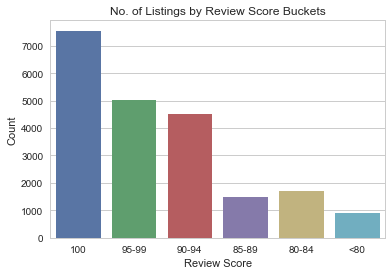

In [40]:
# Visualize distribution of review scores
sns.set(style="whitegrid")
cp1 = sns.countplot(x='review_scores_buckets', data=listings_with_reviews
                    ,order=['100','95-99','90-94','85-89','80-84','<80'])
cp1 = plt.xlabel('Review Score')
cp1 = plt.ylabel('Count')
cp1 = plt.title('No. of Listings by Review Score Buckets')
plt.show()

In [41]:
print('No of listings with 5 star rating:', 
      len(listings_with_reviews[listings_with_reviews['review_scores_rating'] == 100]))
print('% of listings with 5 star rating:', 
      round((len(listings_with_reviews[listings_with_reviews['review_scores_rating'] == 100]))
            /len(listings_with_reviews['review_scores_rating'])*100,2))

No of listings with 5 star rating: 7546
% of listings with 5 star rating: 34.35


More than 1/3 of listings have a review score of 100 i.e. all their reviews were 5 stars. While this is possible, let's look deeper into 5-star listings.

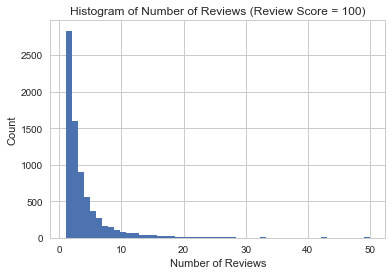

In [42]:
# Visualize review distribution of listings with review score = 100 
listings_5star = listings_with_reviews[listings_with_reviews['review_scores_rating'] == 100]
listings_5star = listings_5star[listings_5star['number_of_reviews'] <= 50]
plt.hist(listings_5star['number_of_reviews'],bins=50)
plt.title("Histogram of Number of Reviews (Review Score = 100)")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()

In [43]:
print('% of 5-star listings with 1 review:', 
      round((len(listings_5star[listings_5star['number_of_reviews'] == 1]))
            /len(listings_5star['number_of_reviews'])*100,2))
print('% of 5-star listings with <= 5 reviews:', 
      round((len(listings_5star[listings_5star['number_of_reviews'] <=5]))
            /len(listings_5star['number_of_reviews'])*100,2))

% of 5-star listings with 1 review: 37.83
% of 5-star listings with <= 5 reviews: 83.54


Majority of the 5-star listings have less than 5 reviews which makes sense as maintaining a perfect score will be increasingly difficult with more reviews.

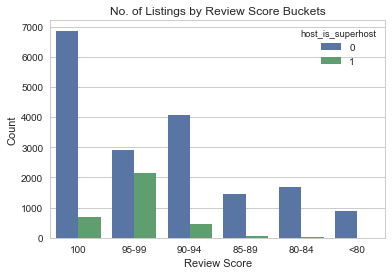

In [44]:
# Visualize distribution of review scores
sns.set(style="whitegrid")
cp1 = sns.countplot(x='review_scores_buckets', hue='host_is_superhost', data=listings_with_reviews
                    ,order=['100','95-99','90-94','85-89','80-84','<80'])
cp1 = plt.xlabel('Review Score')
cp1 = plt.ylabel('Count')
cp1 = plt.title('No. of Listings by Review Score Buckets')
plt.show()

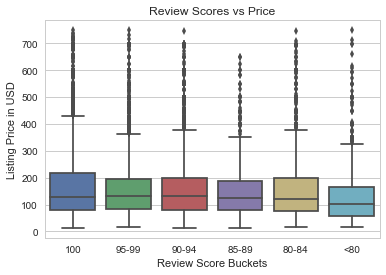

In [45]:
# Visualize review scores vs price
bpr = sns.boxplot(x='review_scores_buckets', y='price', data=listings_with_reviews
                 ,order=['100','95-99','90-94','85-89','80-84','<80'])
bpr = plt.xlabel('Review Score Buckets')
bpr = plt.ylabel('Listing Price in USD')
bpr = plt.title('Review Scores vs Price')
plt.show()

In [46]:
listings_with_reviews.groupby("review_scores_buckets").price.describe()

,count,mean,std,min,25%,50%,75%,max
review_scores_buckets,,,,,,,,
100,7546.0,172.578055,135.949644,13.0,78.0,129.0,219.0,749.0
80-84,1721.0,157.721092,121.473100,17.0,75.0,120.0,198.0,748.0
85-89,1502.0,145.134487,92.652499,13.0,79.0,125.0,188.0,650.0
90-94,4509.0,158.042803,108.372471,14.0,79.0,130.0,200.0,748.0
95-99,5030.0,158.529026,109.505108,16.0,82.0,130.0,195.0,749.0
<80,901.0,134.869034,111.128777,18.0,59.0,101.0,166.0,749.0


The median price of listings are between 120-130 dollars for listings with a review score of >80 and drops to 101 dollars for listings with a review score of <80 i.e. prices are lower when listings have a review score of < 4 stars.

In [47]:
# Explore Neighbourhoods 
listings_price_describe = listings_below_750.groupby("neighbourhood").price.describe()

# Order Neighbourhoods by median price
listings_price_describe.sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Riverview,8.0,391.750000,162.345971,110.0,341.75,419.5,497.00,600.0
Palm Beach,93.0,386.913978,159.132885,40.0,295.00,370.0,498.00,699.0
Point Piper,10.0,317.800000,193.501536,50.0,197.75,325.0,386.75,624.0
La Perouse,3.0,353.000000,313.874179,69.0,184.50,300.0,495.00,690.0
The Rocks,19.0,298.421053,107.930696,103.0,220.50,300.0,350.00,549.0
Seaforth,53.0,294.603774,153.284720,42.0,160.00,300.0,415.00,699.0
Avalon,319.0,308.416928,169.738011,59.0,150.00,261.0,450.00,715.0
Millers Point,116.0,274.163793,136.682109,37.0,178.00,251.0,350.00,721.0
Malabar,28.0,252.714286,152.952391,69.0,133.75,209.5,307.25,699.0


Some of the highest and lowest median price neighbourhoods have less than 10 listings. Let's look at the top 50 neighbourhoods with most listings instead.

In [48]:
# Order Top 50 Neighbourhoods by median price
top_50 = listings_price_describe.sort_values(by='count', ascending=False).iloc[0:49]
top_50.sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Avalon,319.0,308.416928,169.738011,59.0,150.00,261.0,450.00,715.0
Balmain/Birchgrove,259.0,241.131274,159.882655,40.0,120.00,200.0,300.00,731.0
Clovelly,182.0,240.791209,171.134274,30.0,116.00,190.0,315.00,735.0
Fairlight,201.0,211.114428,139.380350,35.0,101.00,184.0,280.00,650.0
Bronte,330.0,229.848485,165.381887,30.0,101.00,179.0,300.00,749.0
Central Business District,465.0,208.739785,98.746012,23.0,150.00,178.0,251.00,660.0
Manly,1379.0,206.299492,141.706778,13.0,101.00,170.0,261.00,728.0
Mosman,395.0,224.556962,163.941254,30.0,108.00,170.0,291.50,735.0
Haymarket,432.0,181.210648,93.282743,21.0,120.00,169.0,219.00,743.0


Just by looking at the Top 50 Neighbourhoods, we can see that the location of a listing plays a huge part in the price of listings. The median price of listings ranges from 59 dollars in Kingsford to 261 dollars in Avalon.

# Clean Calendar Data

Calendar.csv contains calendar data (price and availability) of Sydney Airbnb listings from 6 Oct 2018 - 5 Oct 2019. 

In [49]:
calendar_raw.shape

(12199030, 4)

In [50]:
# Get list of column names
calendar_raw.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [51]:
calendar_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12199030 entries, 0 to 12199029
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 372.3+ MB


In [52]:
calendar_raw.head()

,listing_id,date,available,price
0,11154941,2019-10-05,f,NaN
1,11154941,2019-10-04,f,NaN
2,11154941,2019-10-03,f,NaN
3,11154941,2019-10-02,f,NaN
4,11154941,2019-10-01,f,NaN


In [53]:
# Determine number of missing values in columns
len(calendar_raw) - calendar_raw.count()

listing_id          0
date                0
available           0
price         8913877
dtype: int64

In [54]:
# Drop NaN values (unavailable dates)
calendar_raw = calendar_raw.dropna(how='any')

In [55]:
# Remove $ from price
calendar_raw['price'] = calendar_raw['price'].str.replace('$','')
calendar_raw['price'] = calendar_raw['price'].str.replace(',','').astype('float64')

In [56]:
# Split date
split = pd.DataFrame()
split['year'] = pd.to_datetime(calendar_raw['date']).dt.year
split['month'] = pd.to_datetime(calendar_raw['date']).dt.month
split['weekday_name'] = pd.to_datetime(calendar_raw['date']).dt.weekday_name
split['day_of_week'] = pd.to_datetime(calendar_raw['date']).dt.dayofweek
split.head()

,year,month,weekday_name,day_of_week
386,2019,1,Thursday,3
388,2019,1,Tuesday,1
389,2018,12,Monday,0
390,2018,12,Sunday,6
391,2018,12,Saturday,5


In [57]:
# Add new date columns into dataframe
calendar = calendar_raw.join(split,on=None,how='left',sort=False)
calendar.head()

,listing_id,date,available,price,year,month,weekday_name,day_of_week
386,11169113,2019-01-03,t,245.0,2019,1,Thursday,3
388,11169113,2019-01-01,t,320.0,2019,1,Tuesday,1
389,11169113,2018-12-31,t,320.0,2018,12,Monday,0
390,11169113,2018-12-30,t,320.0,2018,12,Sunday,6
391,11169113,2018-12-29,t,320.0,2018,12,Saturday,5


In [58]:
calendar.tail()

,listing_id,date,available,price,year,month,weekday_name,day_of_week
12199018,28967262,2018-10-17,t,175.0,2018,10,Wednesday,2
12199019,28967262,2018-10-16,t,175.0,2018,10,Tuesday,1
12199020,28967262,2018-10-15,t,175.0,2018,10,Monday,0
12199021,28967262,2018-10-14,t,175.0,2018,10,Sunday,6
12199024,28967262,2018-10-11,t,175.0,2018,10,Thursday,3


In [59]:
# Check number of unique lisitngs in dataset
calendar['listing_id'].nunique()

20333

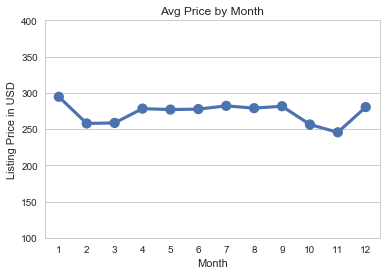

In [60]:
# Visualize price by month
pp1 = sns.pointplot(x='month', y='price', data=calendar)
pp1 = plt.ylim((100,400))
pp1 = plt.xlabel('Month')
pp1 = plt.ylabel('Listing Price in USD')
pp1 = plt.title('Avg Price by Month')
plt.show()

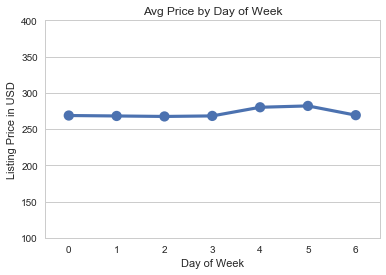

In [61]:
# Visualize average price by day of week
pp1 = sns.pointplot(x='day_of_week', y='price', data=calendar)
pp1 = plt.ylim((100,400))
pp1 = plt.xlabel('Day of Week')
pp1 = plt.ylabel('Listing Price in USD')
pp1 = plt.title('Avg Price by Day of Week')
plt.show()

From the plots, December/January has the highest prices and October/November has the lowest prices. Prices are also highest on the Fridays and Saturdays. 

As this data only shows how hosts decide to price their listings for the upcoming year, it might be worth looking into past bookings to look at guest booking trends. Hosts might also lower their prices nearer to the check-in date if their calendar is still open.